In [26]:
import json, os
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
#TEST_ITERATIONS = ["5/"+x for x in os.listdir("../results/5")]
TEST_ITERATIONS = ["1"]

In [50]:
results = []
for TEST_ITERATION in TEST_ITERATIONS:
	folder = f"../results/{TEST_ITERATION}"

	file_names = os.listdir(folder)

	for file_name in file_names:
		if file_name.startswith("_") or not file_name.endswith(".json"):
			continue
		with open(os.path.join(folder, file_name), "r") as file:
			data = json.load(file)
			data["path"] = folder
			results.append(data)

In [16]:
results[0]

{'fileName': 'vc_25_150_06.txt',
 'graph': {'n': 25, 'm': 150, 'd': 0.5},
 'problemClass': 'SPI',
 'testInstanceName': '150',
 'testInstanceVersion': '06.txt',
 'performanceMetrics': {'generations': [{'best': 1249.0,
    'objective': 1249,
    'avg': 3290.2,
    'evals': 112},
   {'best': 1249.0,
    'objective': 1249,
    'avg': 3504.2266666666665,
    'evals': 144},
   {'best': 1249.0, 'objective': 1249, 'avg': 6110.866666666667, 'evals': 194},
   {'best': 1249.0, 'objective': 1249, 'avg': 4869.92, 'evals': 244},
   {'best': 1249.0, 'objective': 1249, 'avg': 4549.826666666667, 'evals': 285},
   {'best': 1249.0, 'objective': 1249, 'avg': 4213.16, 'evals': 315},
   {'best': 1249.0, 'objective': 1249, 'avg': 4522.293333333333, 'evals': 368},
   {'best': 1249.0, 'objective': 1249, 'avg': 5907.026666666667, 'evals': 411},
   {'best': 1249.0,
    'objective': 1249,
    'avg': 2202.0133333333333,
    'evals': 452},
   {'best': 1249.0,
    'objective': 1249,
    'avg': 2999.8133333333335,
  

In [51]:
rows = []

for entry in results:
    path = entry.get('path')
    fileName = entry.get('fileName')
    graph = entry.get('graph', {})
    problemClass = entry.get('problemClass')
    testInstanceName = entry.get('testInstanceName')
    testInstanceVersion = entry.get('testInstanceVersion')
    
    # Overall objective at the run level (if applicable)
    overall_objective = entry.get('performanceMetrics', {}).get('objective')
    
    # Get the list of generations
    generations = entry.get('performanceMetrics', {}).get('generations', [])
    
    # Create a row per generation with additional metadata.
    for gen_index, gen in enumerate(generations):
        row = {
            'path': path,
            'fileName': fileName,
            'graph_n': graph.get('n'),
            'graph_m': graph.get('m'),
            'graph_d': graph.get('d'),
            'problemClass': problemClass,
            'testInstanceName': int(testInstanceName),
            'testInstanceVersion': testInstanceVersion,
            'overall_objective': overall_objective,
            'generation': gen_index,
            'gen_best': gen.get('best'),
            'gen_objective': gen.get('objective'),
            'gen_avg': gen.get('avg'),
            'gen_evals': gen.get('evals'),
        }
        rows.append(row)

# Create the DataFrame.
df = pd.DataFrame(rows)

# Iteration 1

In [12]:
df_filtered = df#.loc[df['gen_evals'] < 20_000]

df_filtered.loc[:, 'populationSize'] = df_filtered['path'].apply(lambda x: int(x.split('/')[-1]))

df_sorted = df_filtered.sort_values(by=['populationSize', 'problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['populationSize', 'problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

last_gen_df.groupby(['populationSize', 'problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean'
}).sort_values(by=['populationSize','problemClass', 'testInstanceName']).reset_index().set_index(['populationSize', 'problemClass', 'testInstanceName']).unstack(level='populationSize')



gen_objective
populationSize                            1
problemClass testInstanceName              
LPI          10000                  48052.6
MPI          500                     4849.5
             750                     9512.6
             2000                    6129.4
             3000                   12110.3
SPI          60                       865.8
             120                     1039.3
             150                     1269.5

In [13]:
last_gen_df.groupby(['populationSize']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean'
}).T


populationSize,1
gen_objective,10478.625


# Iteration 2

In [24]:
df_filtered = df#.loc[df['gen_evals'] < 20_000]

df_filtered.loc[:, 'populationSize'] = df_filtered['path'].apply(lambda x: int(x.split('/')[-1]))

df_sorted = df_filtered.sort_values(by=['populationSize', 'problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['populationSize', 'problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

last_gen_df.groupby(['populationSize', 'problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean'
}).sort_values(by=['populationSize','problemClass', 'testInstanceName']).reset_index().set_index(['populationSize', 'problemClass', 'testInstanceName']).unstack(level='populationSize')



gen_objective                             \
populationSize                          50       75       100      125   
problemClass testInstanceName                                            
LPI          10000                  48074.7  47939.4  48052.6  47933.6   
MPI          500                     4875.7   4885.6   4849.5   4842.8   
             750                     9559.1   9523.6   9512.6   9473.4   
             2000                    6139.7   6149.5   6129.4   6119.6   
             3000                   12136.2  12101.2  12110.3  12028.2   
SPI          60                       875.8    869.2    865.8    864.6   
             120                     1039.0   1038.5   1039.3   1039.0   
             150                     1273.7   1275.3   1269.5   1264.0   

                                                          
populationSize                     150      200      400  
problemClass testInstanceName                             
LPI          10000             47878.9  47827.4  47782.5  
MPI          500                4846.7   4844.3   4801.9  
             750                9595.9   9520.3   9439.5  
             2000               6117.1   6106.2   6085.5  
             3000              12083.2  12060.7  11975.2  
SPI          60                  864.8    865.3    861.8  
             120                1038.2   1038.2   1039.0  
             150                1265.6   1264.0   1264.0

In [25]:
last_gen_df.groupby(['populationSize']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean'
}).T


populationSize,50,75,100,125,150,200,400
gen_objective,10496.7375,10472.7875,10478.625,10445.65,10461.3,10440.8,10406.175


# Iteration 3

In [32]:
df_filtered = df#.loc[df['gen_evals'] < 20_000]

df_filtered.loc[:, 'MUTB_CXPB'] = df_filtered['path'].apply(lambda x: (x.split('/')[-1]))

df_sorted = df_filtered.sort_values(by=['MUTB_CXPB', 'problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['MUTB_CXPB', 'problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

last_gen_df.groupby(['MUTB_CXPB', 'problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean'
}).sort_values(by=['MUTB_CXPB', 'problemClass', 'testInstanceName']).reset_index().set_index(['MUTB_CXPB', 'problemClass', 'testInstanceName']).unstack(level='MUTB_CXPB')


gen_objective                             \
MUTB_CXPB                          0.01_0.3 0.01_0.4 0.01_0.5 0.05_0.3   
problemClass testInstanceName                                            
LPI          10000                  47679.0  47654.3  47830.6  47634.4   
MPI          500                     4847.0   4915.1   4904.0   4808.9   
             750                     9557.6   9526.0   9599.4   9559.1   
             2000                    6106.7   6104.8   6105.2   6073.7   
             3000                   12028.0  12075.8  12021.2  12016.1   
SPI          60                       861.8    861.9    861.8    861.8   
             120                     1038.2   1038.2   1038.2   1038.2   
             150                     1264.0   1264.0   1264.0   1264.0   

                                                                            
MUTB_CXPB                     0.05_0.4 0.05_0.5  0.1_0.3  0.1_0.4  0.1_0.5  
problemClass testInstanceName                                               
LPI          10000             47744.2  47803.9  47804.5  47786.7  47864.6  
MPI          500                4866.4   4833.6   4798.5   4768.0   4811.3  
             750                9512.6   9512.4   9450.9   9537.4   9485.9  
             2000               6109.9   6088.5   6090.3   6115.3   6092.1  
             3000              12023.0  12029.1  12016.1  12037.1  12017.6  
SPI          60                  861.8    861.8    861.8    861.8    863.8  
             120                1038.2   1038.2   1038.2   1038.2   1038.2  
             150                1264.0   1264.0   1264.0   1264.0   1265.6

In [63]:
df_filtered = df

df_filtered.loc[:, 'MUTB_CXPB'] = df['path'].apply(lambda x: (x.split('/')[-1]))

df_filtered = df_filtered.loc[df_filtered['MUTB_CXPB'] == '0.25_0.4']


# Sort to ensure last generation is correctly identified
df_sorted = df_filtered.sort_values(by=['problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

result = last_gen_df.groupby(['problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean',
	'gen_evals': 'mean'
}).reset_index().sort_values(by=['problemClass', 'testInstanceName'])

# Display or save result
result


,problemClass,testInstanceName,gen_objective,gen_evals
0,LPI,10000,12093.5,20000.0
1,MPI,500,807.8,20000.0
2,MPI,750,2656.4,20000.0
3,MPI,2000,205.4,20000.0
4,MPI,3000,1007.8,20000.0
5,SPI,60,172.7,20000.0
6,SPI,120,85.5,20000.0
7,SPI,150,118.4,20000.0


# Iteration 4

In [36]:
df_filtered = df

df_filtered.loc[:, 'K'] = df_filtered['path'].apply(lambda x: int(x.split('/')[-1]))

df_sorted = df_filtered.sort_values(by=['K', 'problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['K', 'problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

last_gen_df.groupby(['K', 'problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean'
}).sort_values(by=['K', 'problemClass', 'testInstanceName']).reset_index().set_index(['K', 'problemClass', 'testInstanceName']).unstack(level='K')


gen_objective                           
K                                         2        3        4        5
problemClass testInstanceName                                         
LPI          10000                  48516.0  47764.5  47707.5  47731.8
MPI          500                     4859.7   4785.3   4814.8   4775.6
             750                     9523.6   9433.9   9477.7   9509.2
             2000                    6128.8   6079.7   6093.7   6093.5
             3000                   11998.1  12026.4  11990.7  12004.4
SPI          60                       863.7    861.8    861.8    861.8
             120                     1038.2   1038.2   1038.2   1038.2
             150                     1266.0   1264.0   1265.6   1264.0

In [37]:
df_filtered = df

df_filtered.loc[:, 'K'] = df['path'].apply(lambda x: int(x.split('/')[-1]))

df_filtered = df_filtered.loc[df_filtered['K'] == 2]


# Sort to ensure last generation is correctly identified
df_sorted = df_filtered.sort_values(by=['problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

result = last_gen_df.groupby(['problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean',
	'gen_evals': 'mean'
}).reset_index().sort_values(by=['problemClass', 'testInstanceName'])

# Display or save result
result


,problemClass,testInstanceName,gen_objective,gen_evals
0,LPI,10000,48516.0,20000.0
1,MPI,500,4859.7,20000.0
2,MPI,750,9523.6,20000.0
3,MPI,2000,6128.8,20000.0
4,MPI,3000,11998.1,20000.0
5,SPI,60,863.7,20000.0
6,SPI,120,1038.2,20000.0
7,SPI,150,1266.0,20000.0


# Iteration 5

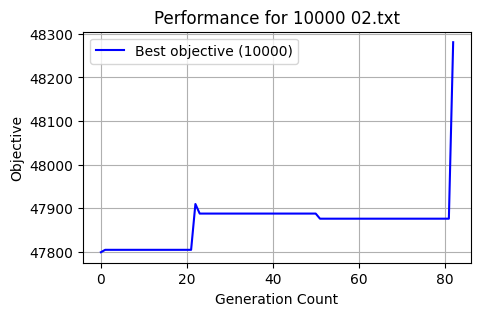

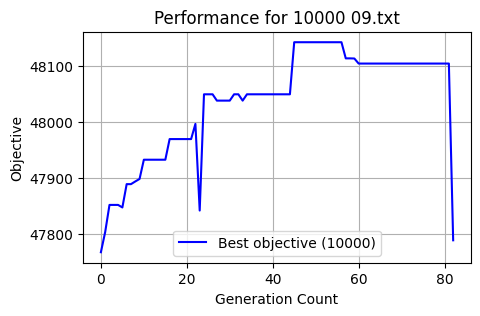

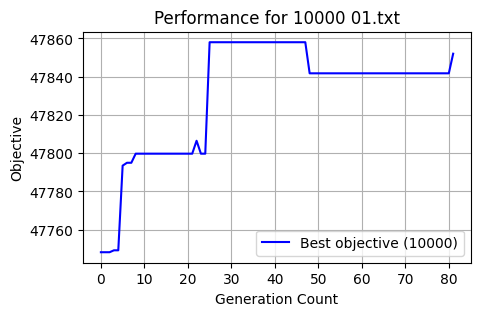

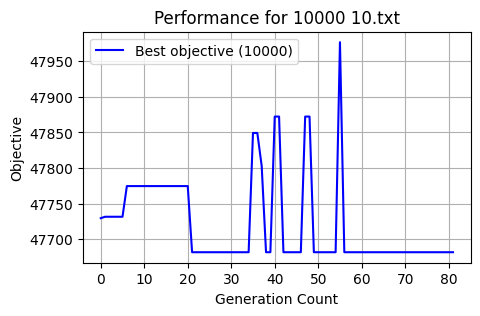

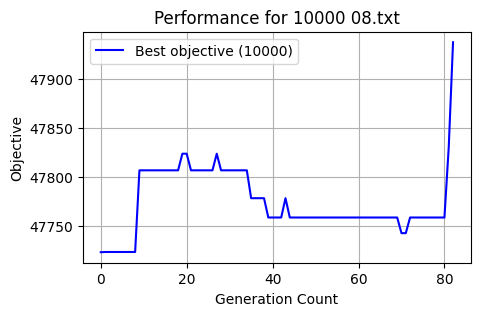

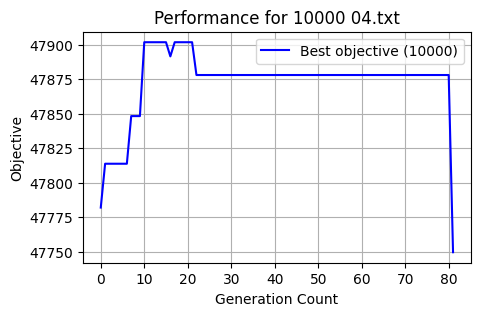

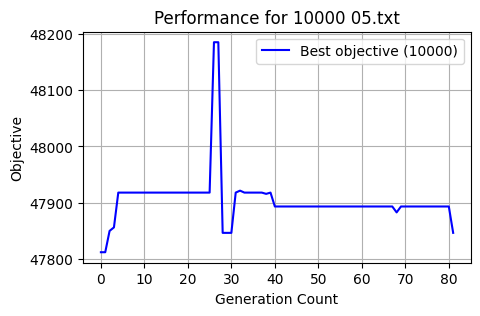

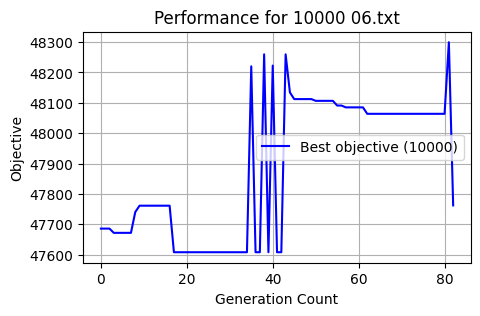

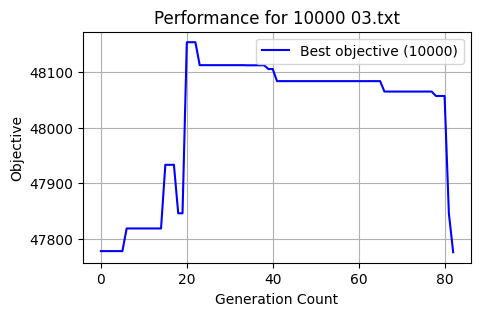

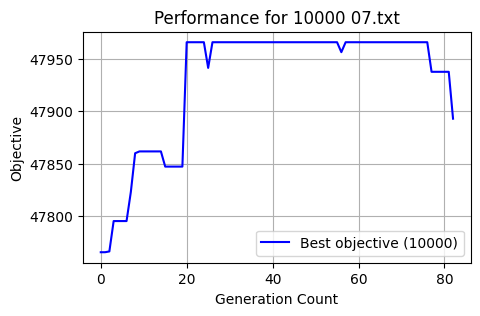

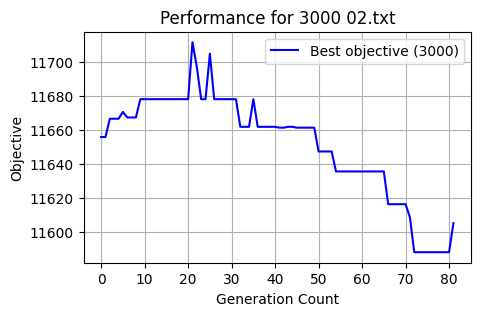

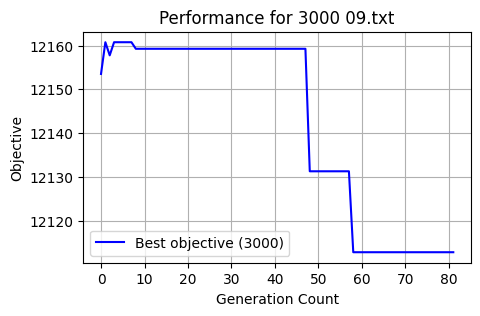

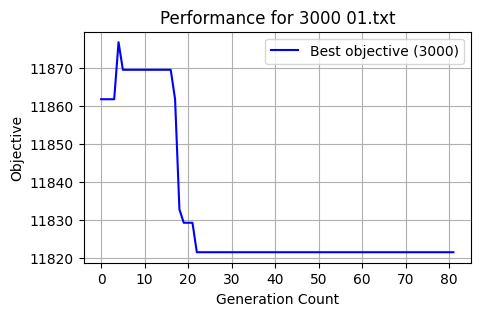

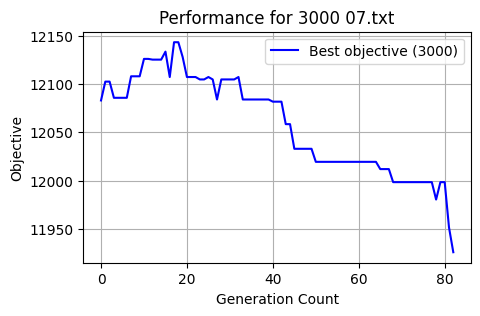

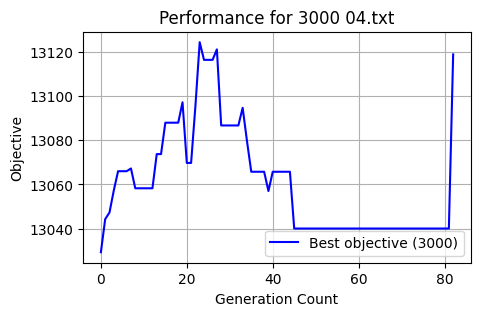

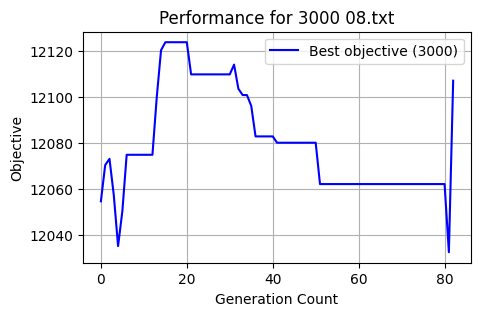

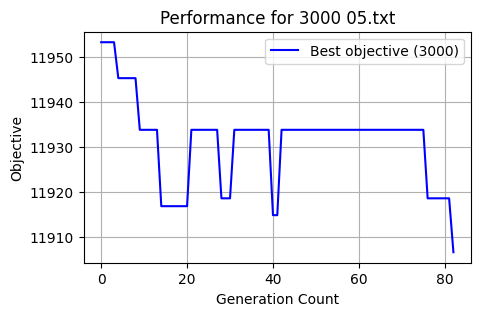

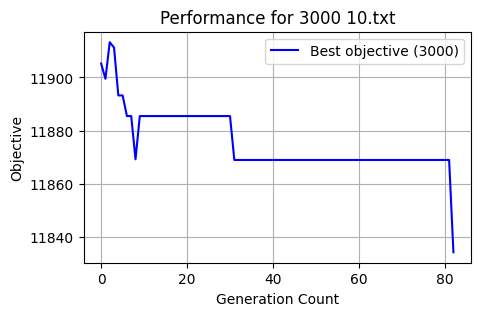

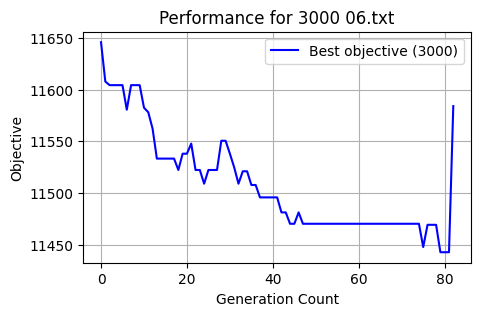

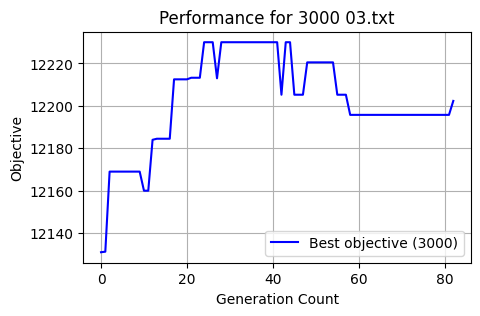

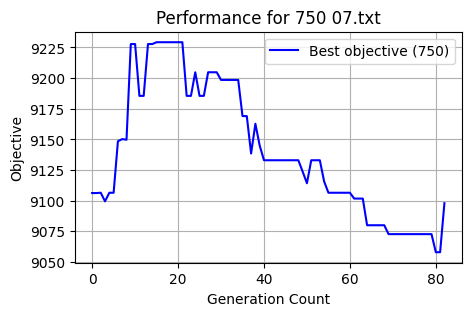

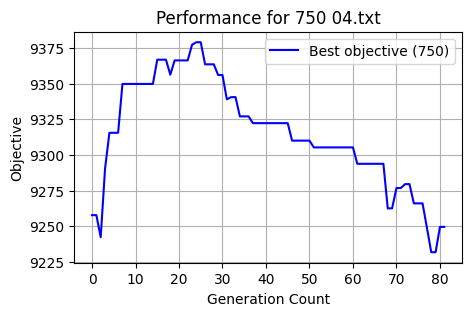

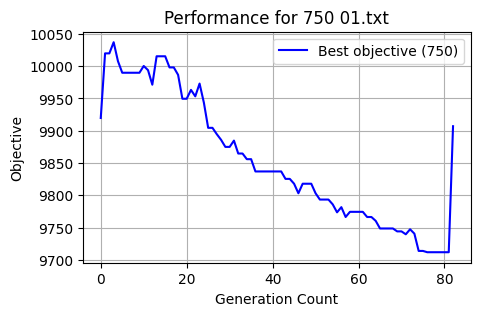

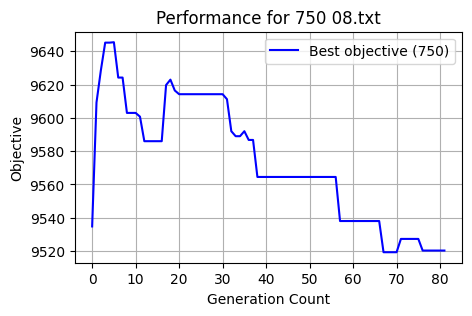

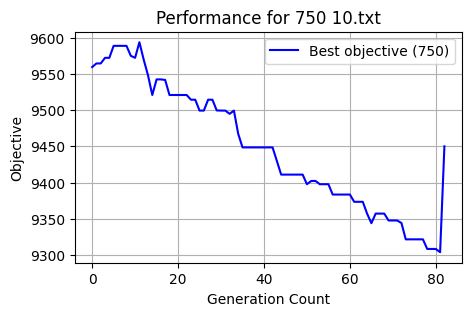

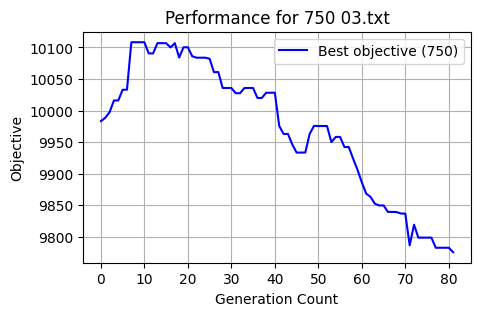

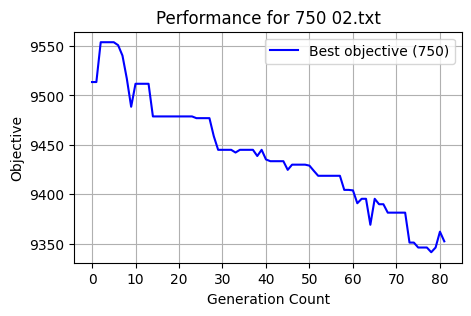

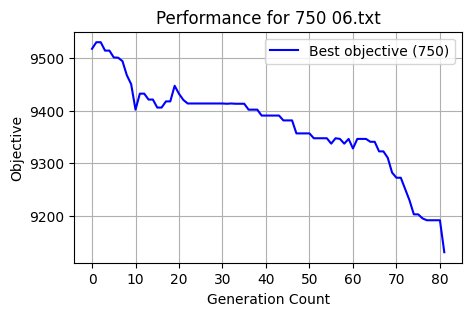

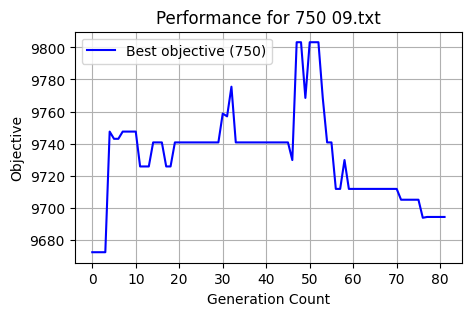

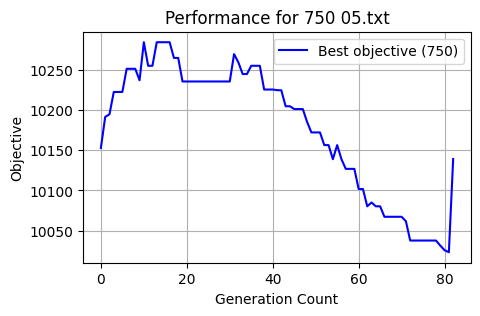

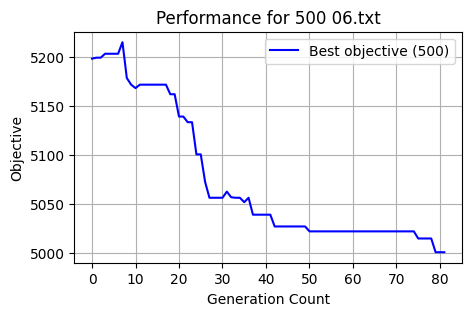

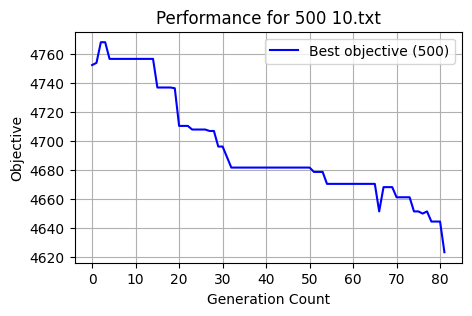

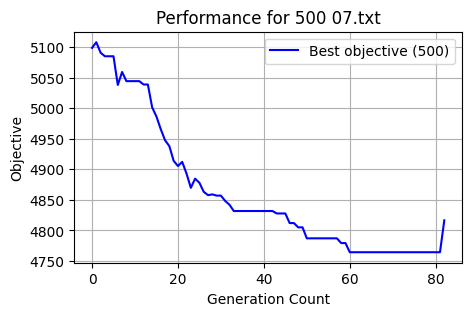

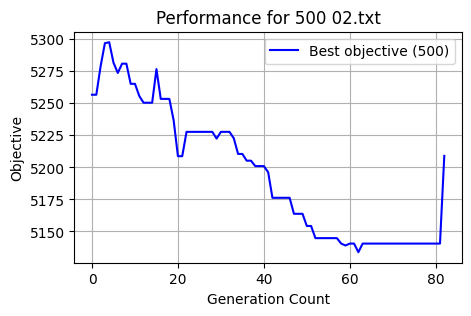

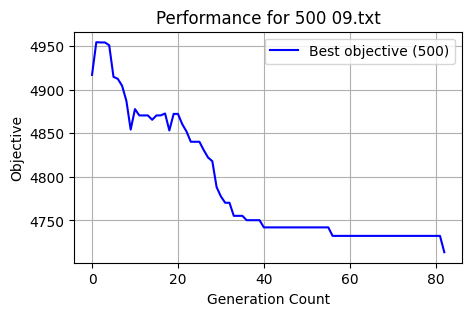

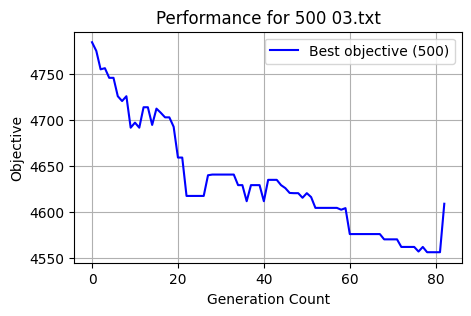

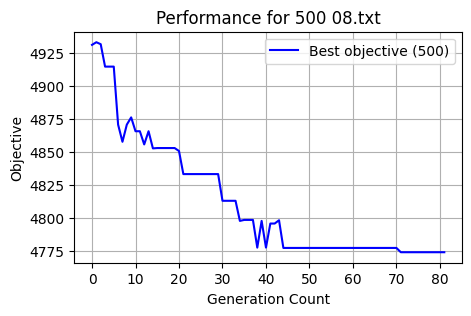

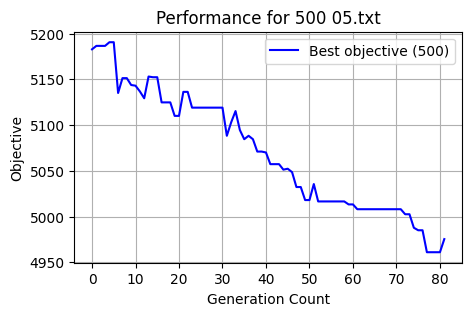

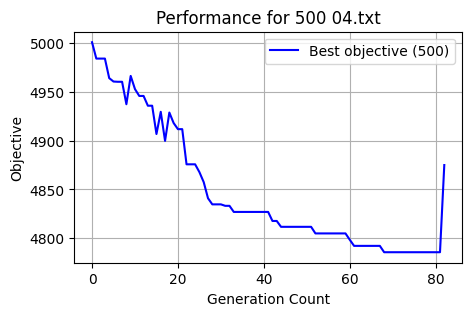

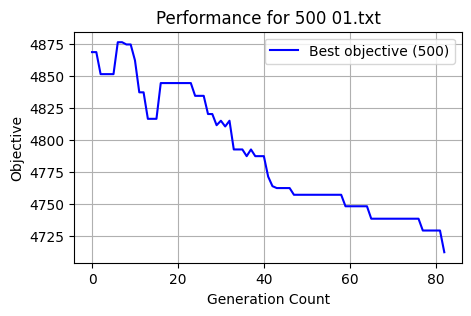

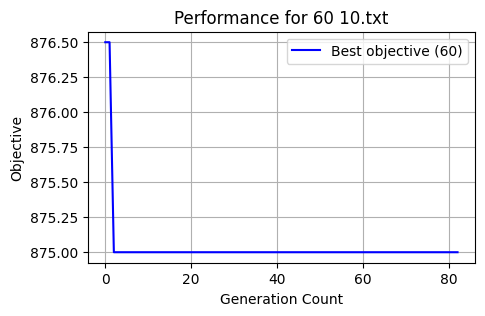

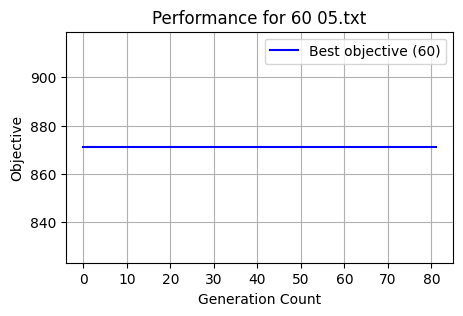

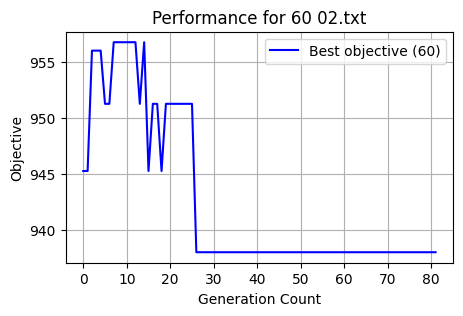

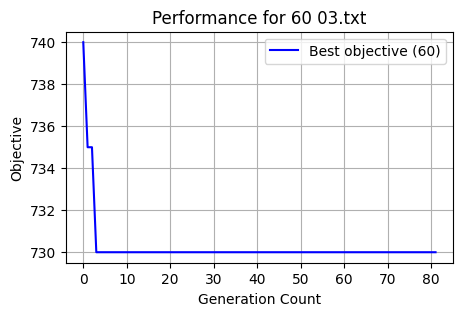

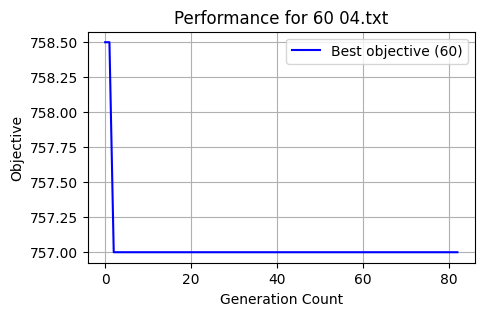

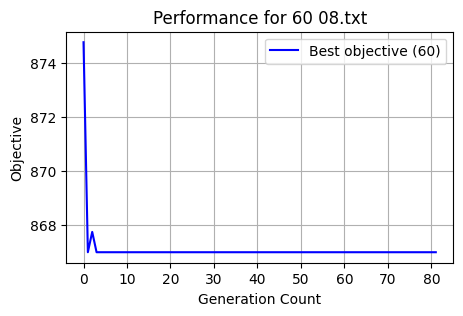

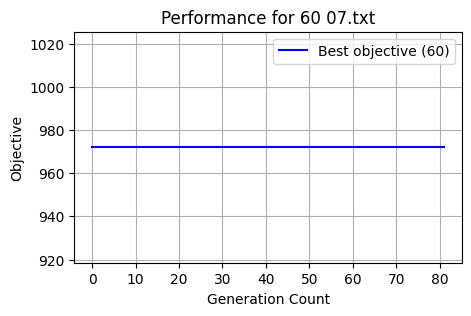

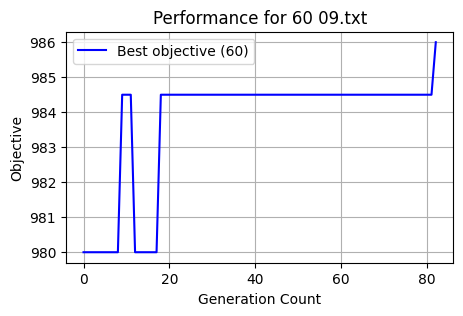

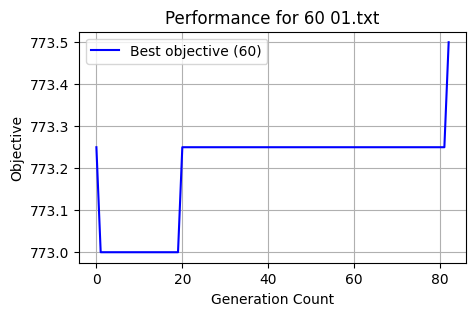

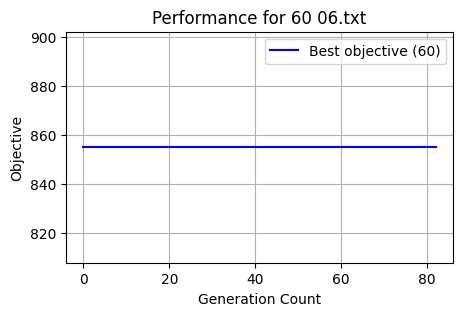

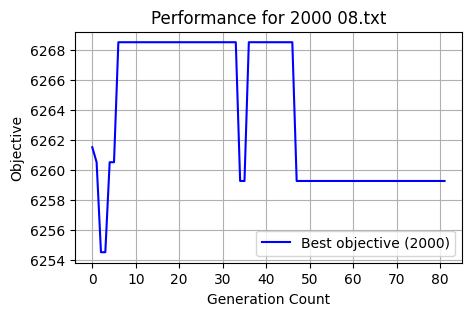

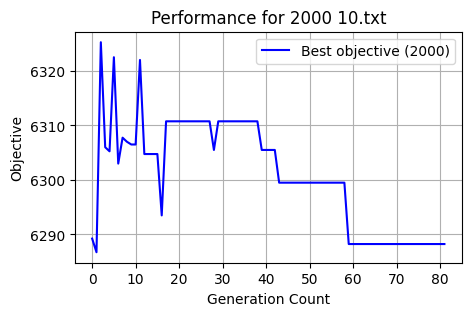

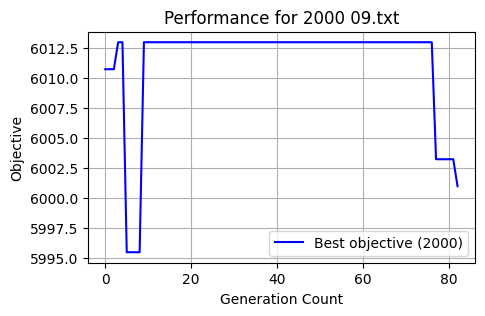

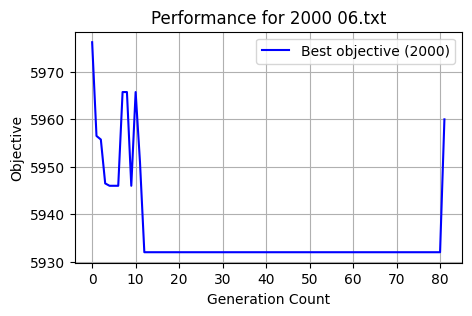

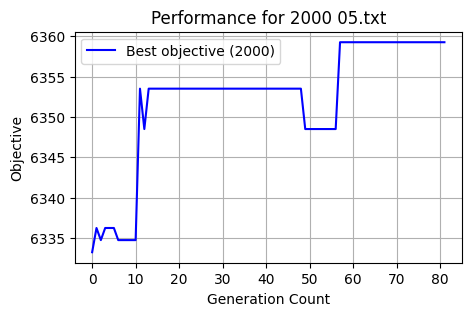

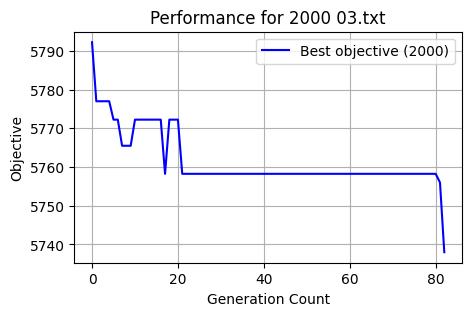

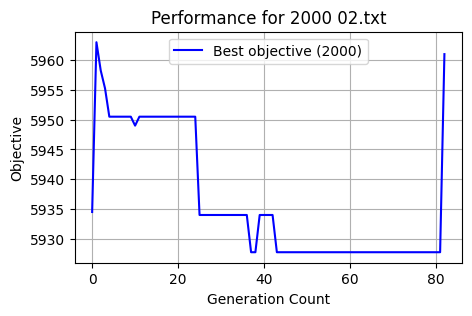

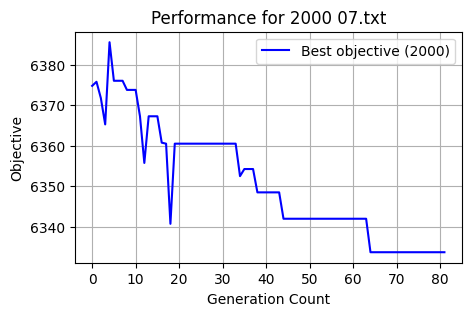

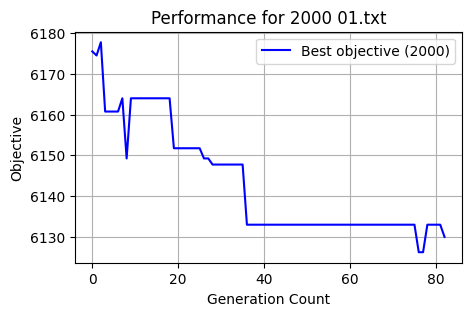

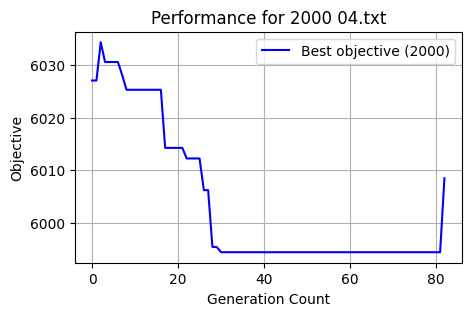

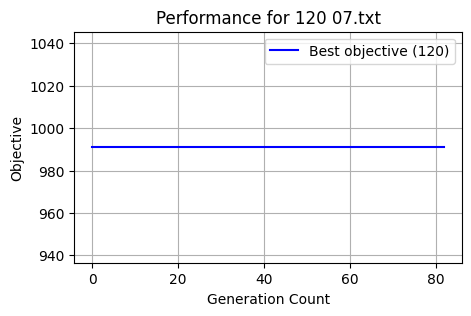

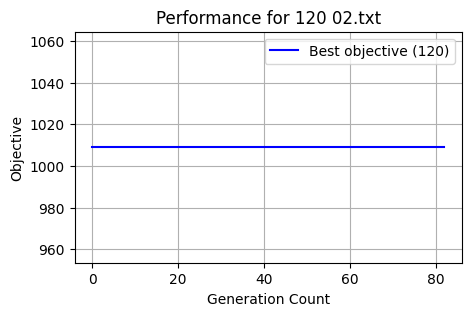

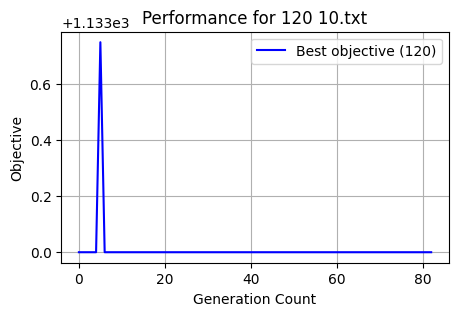

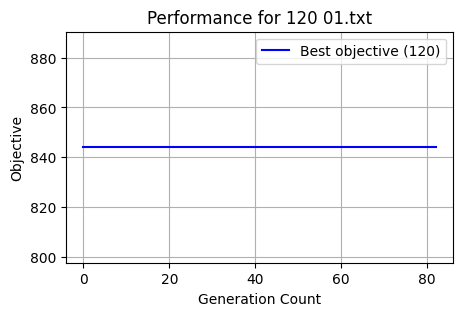

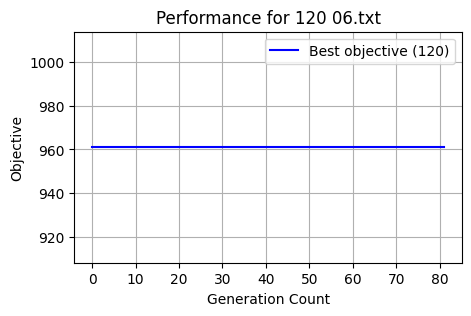

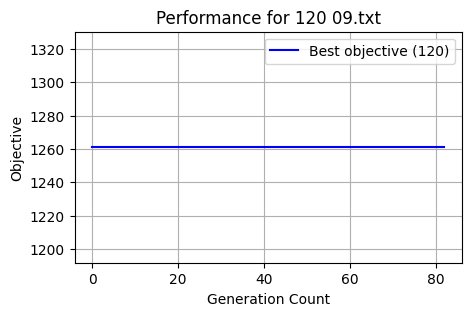

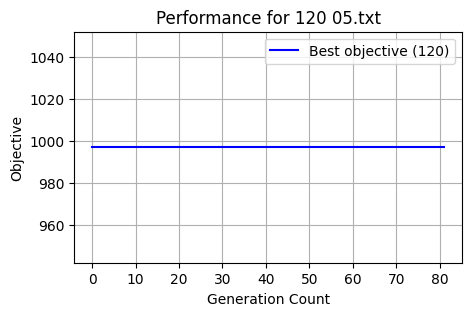

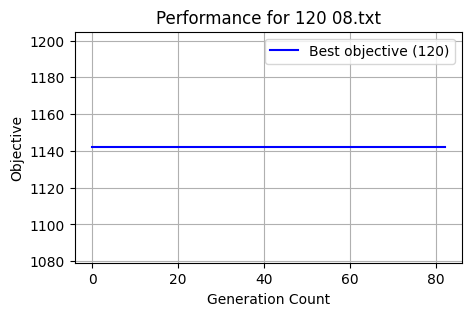

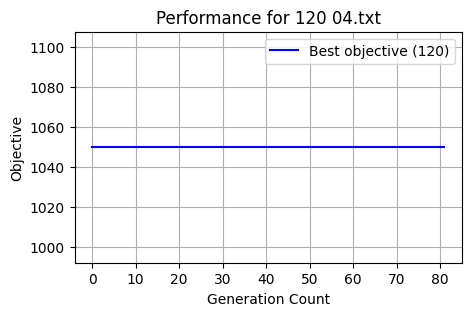

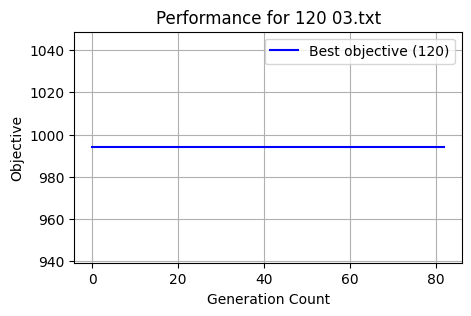

In [45]:
TEST_ITERATION = "5"

# Create the output directory for the plots.
output_dir = os.path.join("..", "results", str(TEST_ITERATION), "plots")
os.makedirs(output_dir, exist_ok=True)

problem_classes = df["testInstanceName"].unique()

# Plot for each problem class
for problem_class in problem_classes[1:]:
    for testInstanceVersion in df[df["testInstanceName"] == problem_class]["testInstanceVersion"].unique():


        plt.figure(figsize=(5, 3))

        # Filter data for the specific problem class
        df_subset = df[(df["testInstanceName"] == problem_class) & (df["testInstanceVersion"] == testInstanceVersion)]

        df_grouped = df_subset.groupby("generation", as_index=False).agg({
            "gen_best": "mean"
        })

        # Plot evaluation counts vs. avg objective
        plt.plot(df_grouped["generation"], df_grouped["gen_best"], marker='', linestyle='-', label=f'Best objective ({problem_class})', color='blue')

        # Titles and labels
        plt.title(f'Performance for {problem_class} {testInstanceVersion}')
        plt.xlabel('Generation Count')
        plt.ylabel('Objective')
        plt.legend()
        plt.grid(True)

        file_path = os.path.join(output_dir, f"objective_vs_gen_{problem_class}_{testInstanceVersion}.jpg")
        plt.savefig(file_path, format='jpg', dpi=300)
        plt.show()

        # Show the plot
        plt.show()

In [52]:

# Sort to ensure last generation is correctly identified
df_sorted = df.sort_values(by=['problemClass', 'testInstanceName', 'testInstanceVersion', 'generation'])

# Select the last generation for each problemClass/testInstanceName/testInstanceVersion
last_gen_df = df_sorted.loc[df_sorted.groupby(['problemClass', 'testInstanceName', 'testInstanceVersion'])['generation'].idxmax()]

result = last_gen_df.groupby(['problemClass', 'testInstanceName']).agg({
	#'gen_best': 'mean',
	'gen_objective': 'mean',
	'gen_evals': 'mean'
}).reset_index().sort_values(by=['problemClass', 'testInstanceName'])

# Display or save result
result

,problemClass,testInstanceName,gen_objective,gen_evals
0,LPI,10000,47784.5,10501.7
1,MPI,500,4768.6,18637.0
2,MPI,750,9460.2,16703.0
3,MPI,2000,6091.0,12021.6
4,MPI,3000,12054.5,12279.1
5,SPI,60,861.8,10430.5
6,SPI,120,1038.2,10222.2
7,SPI,150,1264.0,10272.1
